In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bootcampviztools import *

In [2]:
health = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\EDA_Patricia_Diez\EDA_Entrega\src\data\health_cleaned.csv")
health.head(2)

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Has_condition
0,32,Non-Binary,Hr,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Yes
1,40,Female,Data Scientist,It,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Yes


#ANALISIS CATEGORICAS

Teniendo en cuenta que la variable más importante es Work_Location, vamos a empezar el análisis por las relaciones que pueda tener con Job_Role, Stress_Level, Mental_Health_Condition, Access_to_Mental_Health_Resoures, Productivity_Change, Satisfaction_with_Remote_Worky y Sleep_Quality para ver si este afecta a la salud del trabajador o no. 

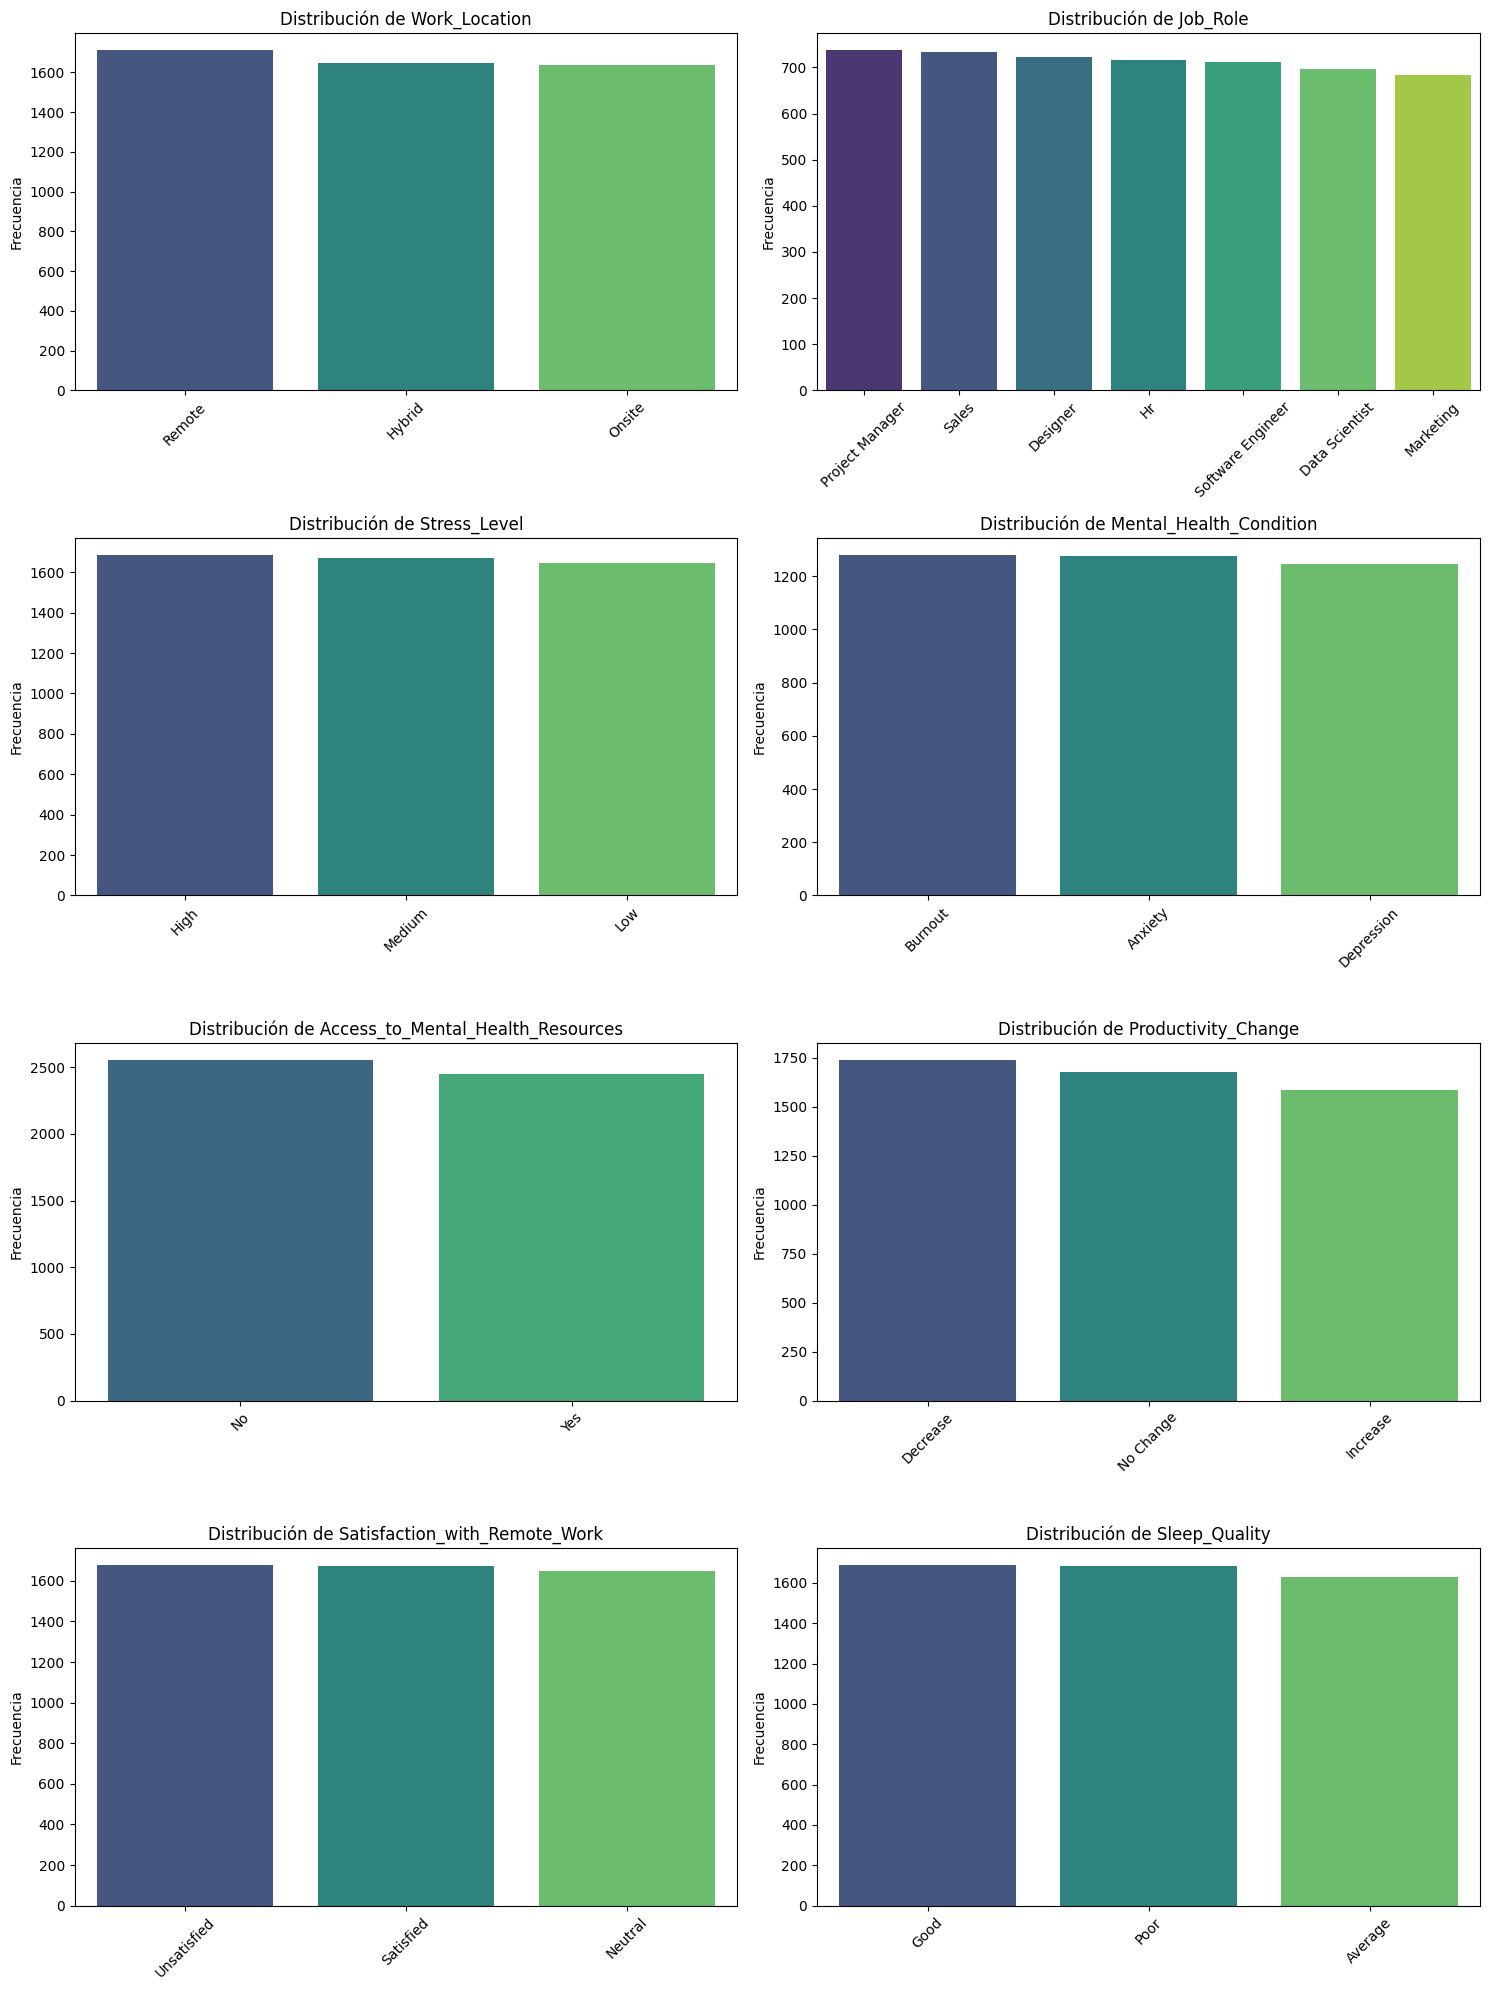

In [3]:
pinta_distribucion_categoricas(health, ["Work_Location","Job_Role", "Stress_Level", "Mental_Health_Condition", 
                       "Access_to_Mental_Health_Resources", "Productivity_Change", "Satisfaction_with_Remote_Work",
                       "Sleep_Quality"])

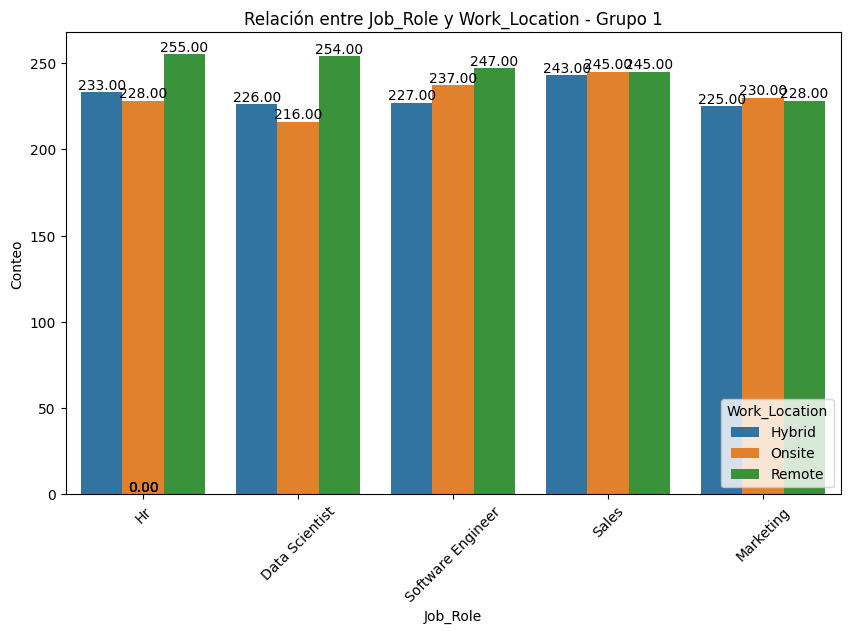

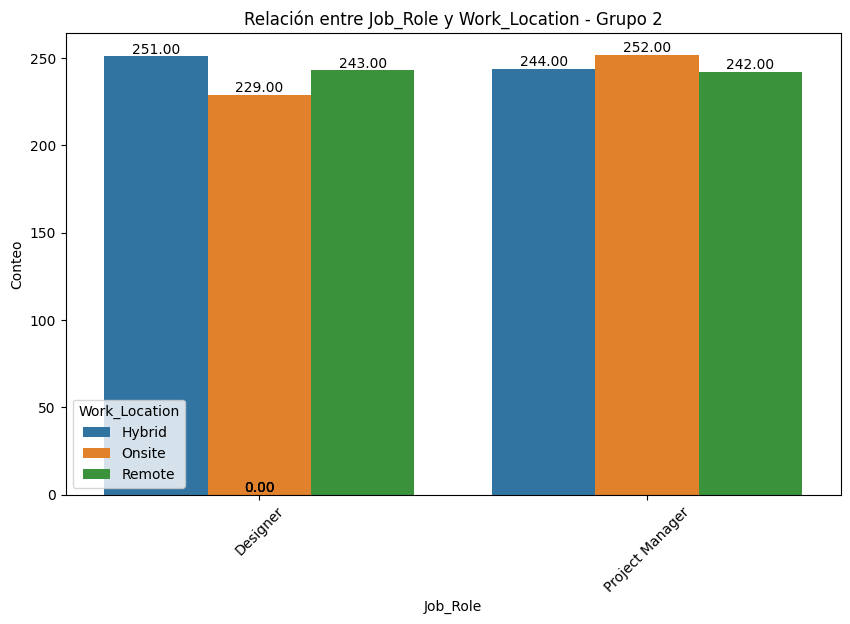

In [4]:
plot_categorical_relationship_fin(health, "Job_Role", "Work_Location", show_values=True)

Parece que sí puede haber relación entre el trabajo que realizan y si están en hybrid o no, pero con variaciones muy ligeras. Pasamos a la siguiente variable.

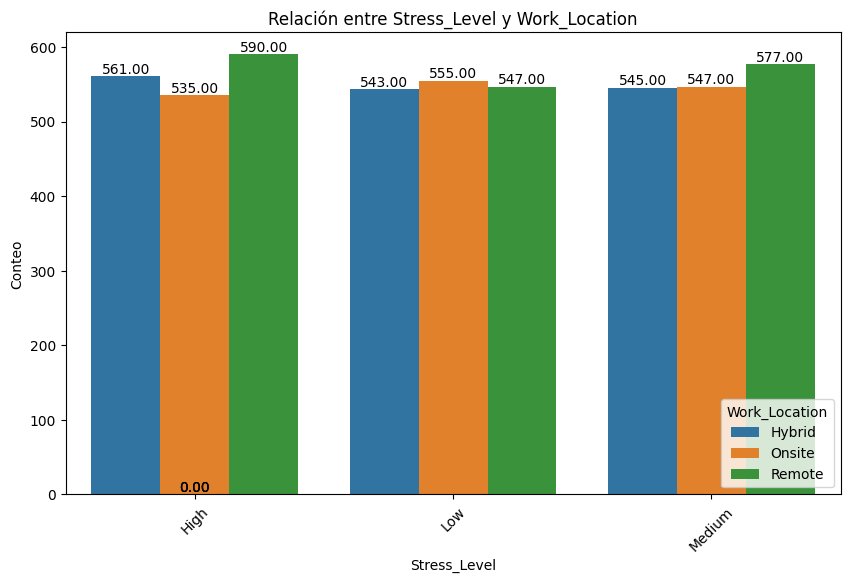

In [5]:
plot_categorical_relationship_fin(health, "Stress_Level", "Work_Location", show_values=True)

De nuevo variaciones muy ligeras, pero parece que los que más estrés tiennen son los remote y los hybrids

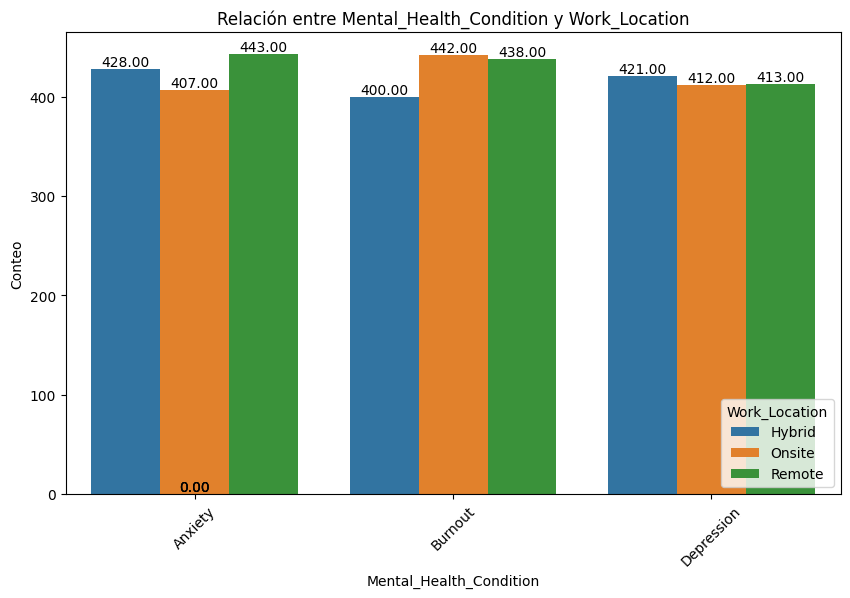

In [6]:
plot_categorical_relationship_fin(health, "Mental_Health_Condition", "Work_Location", show_values=True)

Más burnout Onsite pero luego en cambio más ansiedad en remoto e hybrid e incluso un poco más de depresión

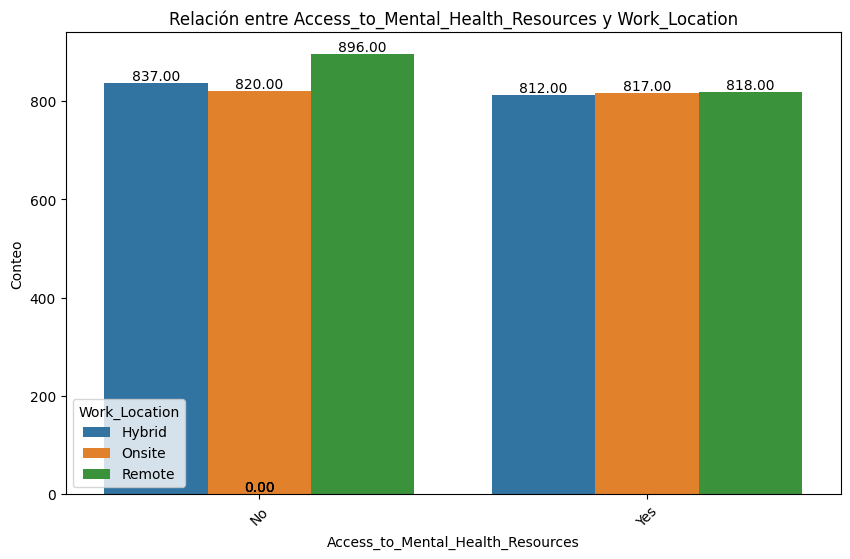

In [7]:
plot_categorical_relationship_fin(health, "Access_to_Mental_Health_Resources", "Work_Location", show_values=True)

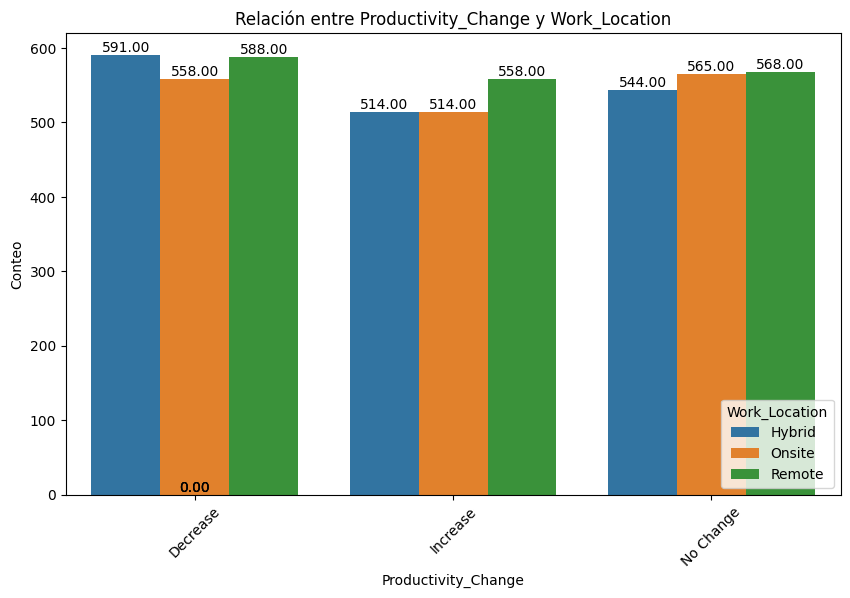

In [8]:
plot_categorical_relationship_fin(health, "Productivity_Change", "Work_Location", show_values=True)

Sobre todo decrease en remoto e hybrid

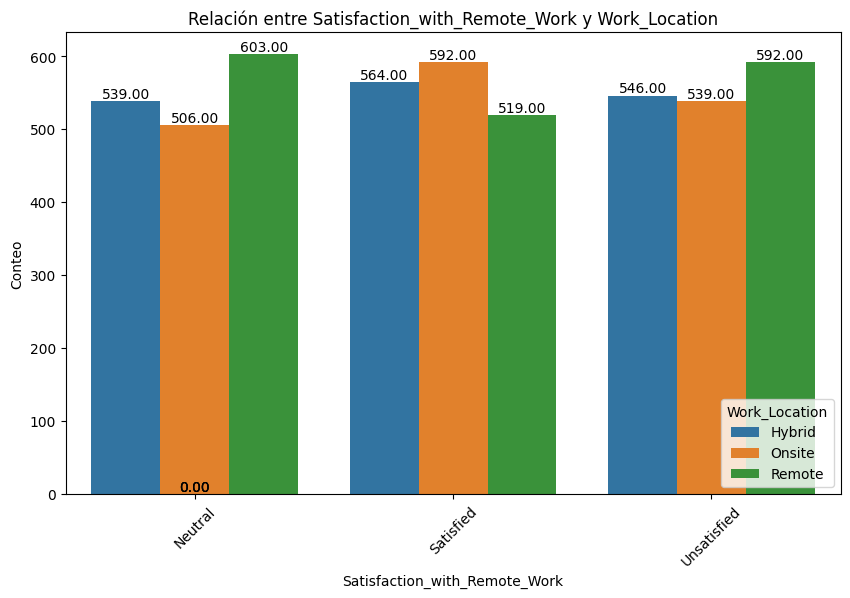

In [9]:
plot_categorical_relationship_fin(health, "Satisfaction_with_Remote_Work", "Work_Location", show_values=True)

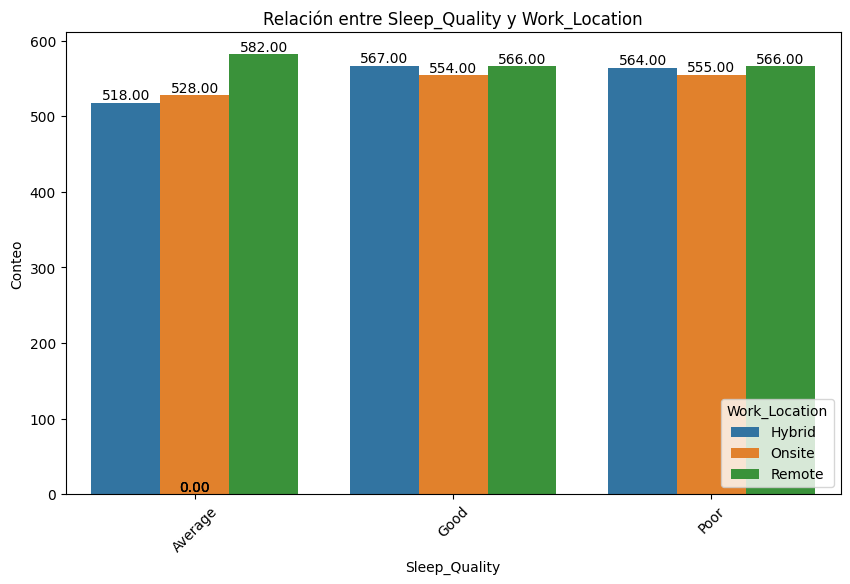

In [10]:
plot_categorical_relationship_fin(health, "Sleep_Quality", "Work_Location", show_values=True)

No varía mucho dependiendo del trabajo

#ANALISIS CATEGORICAS Y NUMERICAS 
Seguimos con Work_Location, ahora relacionandola con las numéricas: 'Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
    'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
   'Social_Isolation_Rating', 'Company_Support_for_Remote_Work'

(2,)


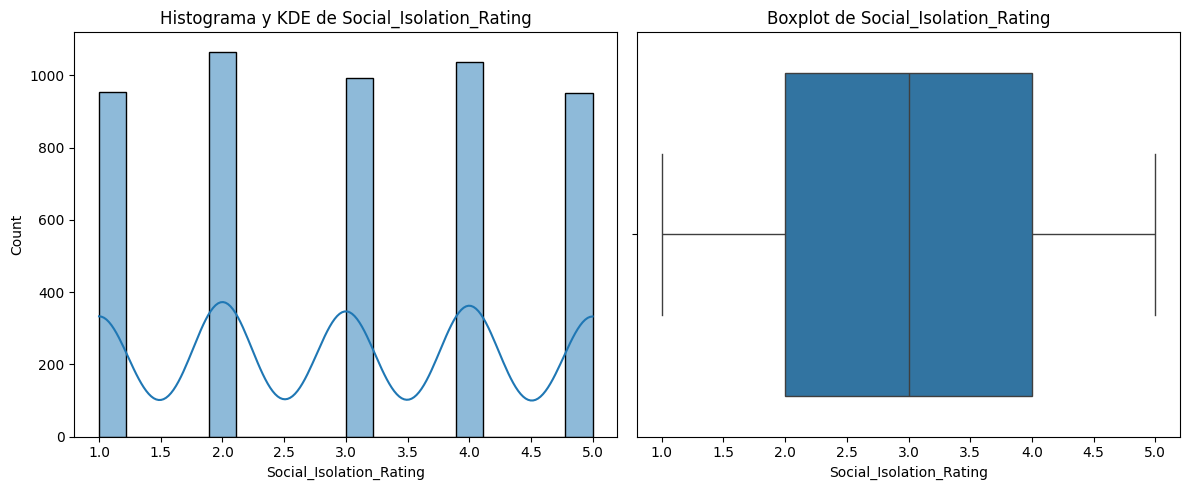

In [11]:
plot_combined_graphs(health, ["Social_Isolation_Rating"])

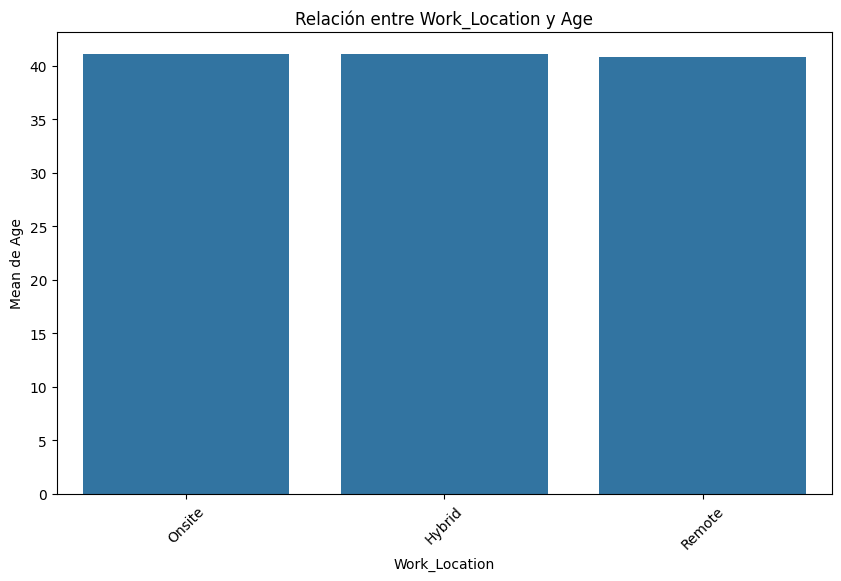

In [12]:
plot_categorical_numerical_relationship(health,"Work_Location", "Age")

No hay mucha diferencia

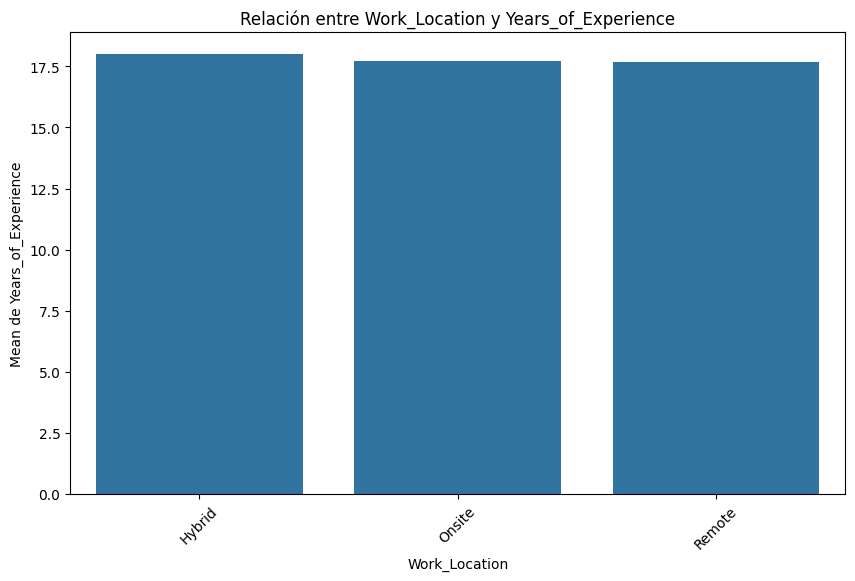

In [13]:
plot_categorical_numerical_relationship(health,"Work_Location", "Years_of_Experience")

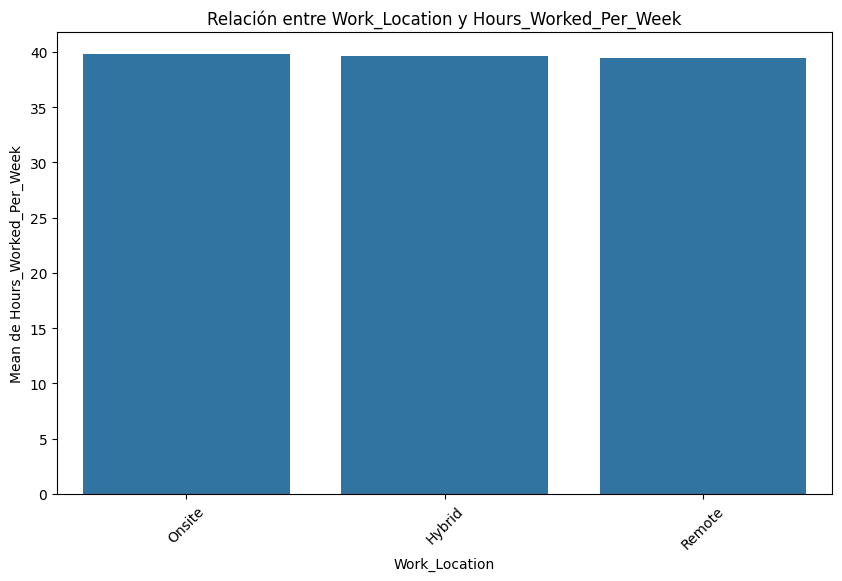

In [14]:
plot_categorical_numerical_relationship(health,"Work_Location", "Hours_Worked_Per_Week")

Parece que trabajan las mismas horas

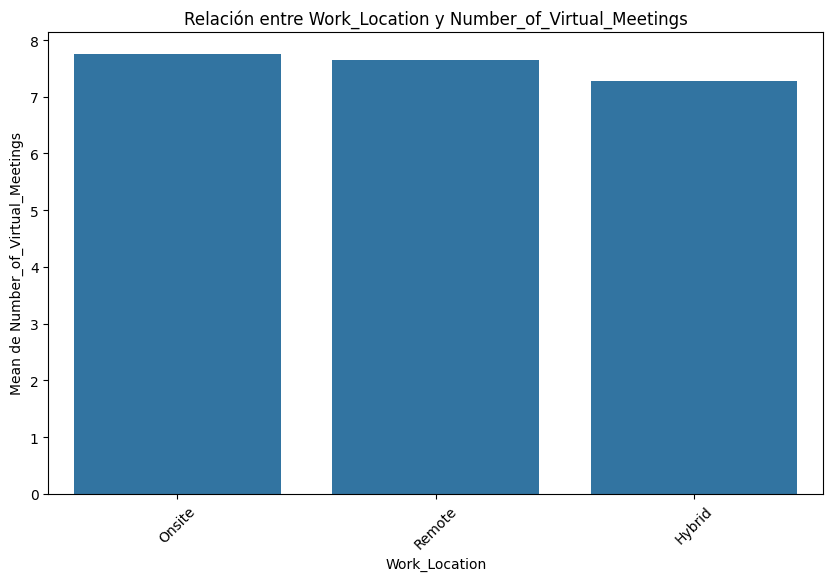

In [15]:
plot_categorical_numerical_relationship(health,"Work_Location", "Number_of_Virtual_Meetings")

Parece que en hybrid hay menos meetings que en el resto

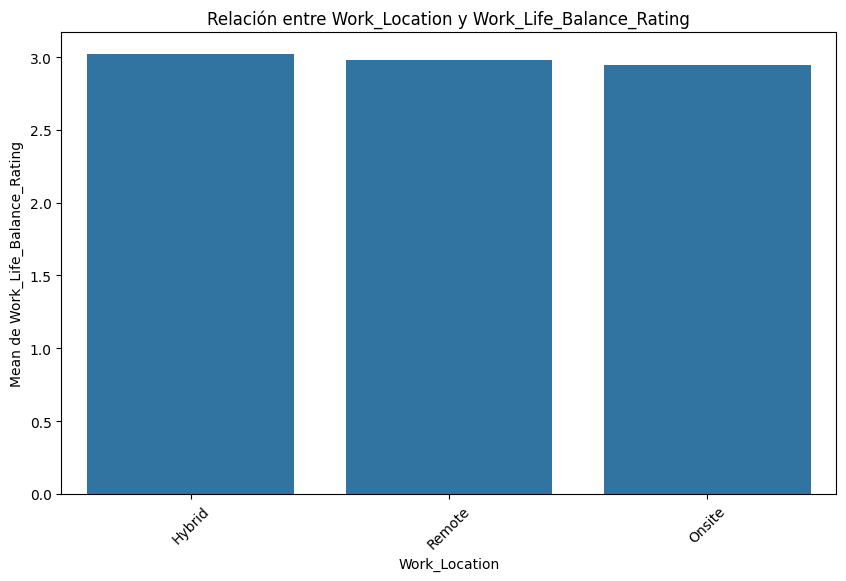

In [16]:
plot_categorical_numerical_relationship(health,"Work_Location", "Work_Life_Balance_Rating")

En onsite parece que tienen menos 

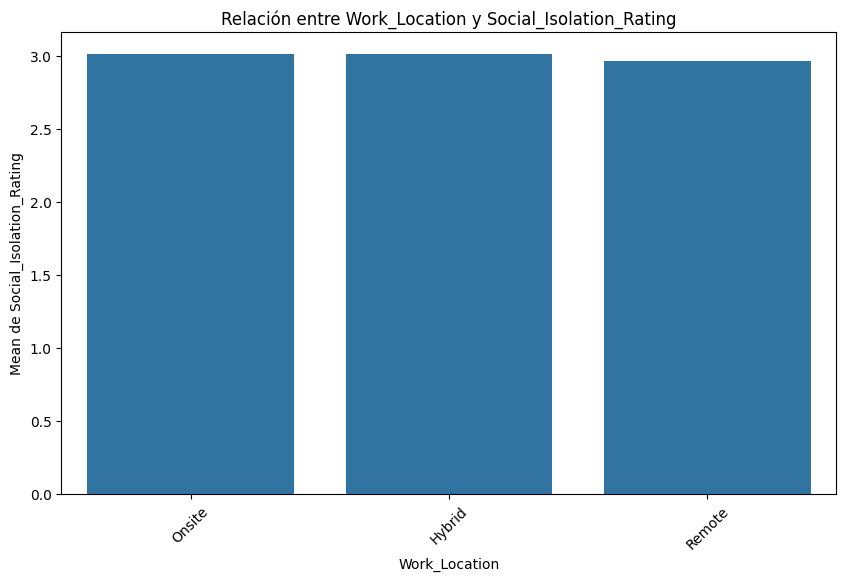

In [17]:
plot_categorical_numerical_relationship(health,"Work_Location", "Social_Isolation_Rating")

En remote es menor

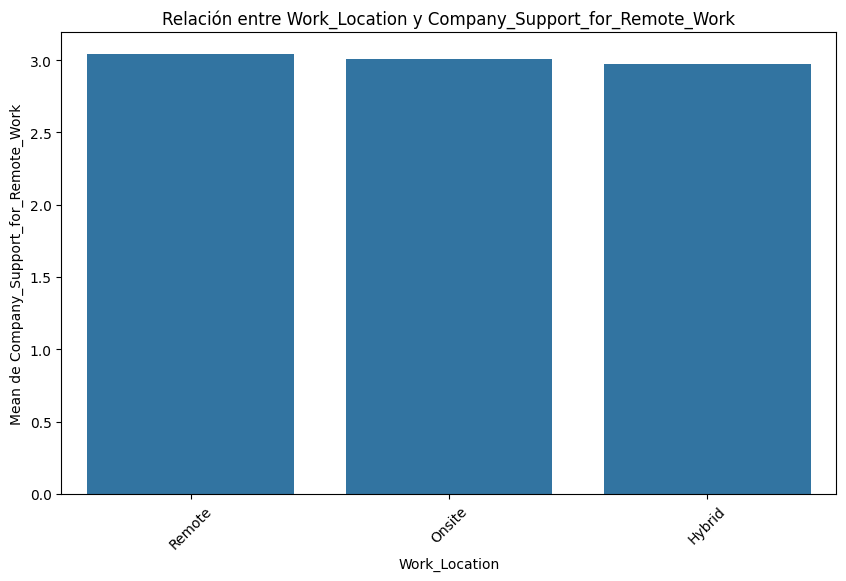

In [18]:
plot_categorical_numerical_relationship(health,"Work_Location", "Company_Support_for_Remote_Work")

Enn hybrid es donde menos support reciben

#ANALISIS DE NUMERICAS

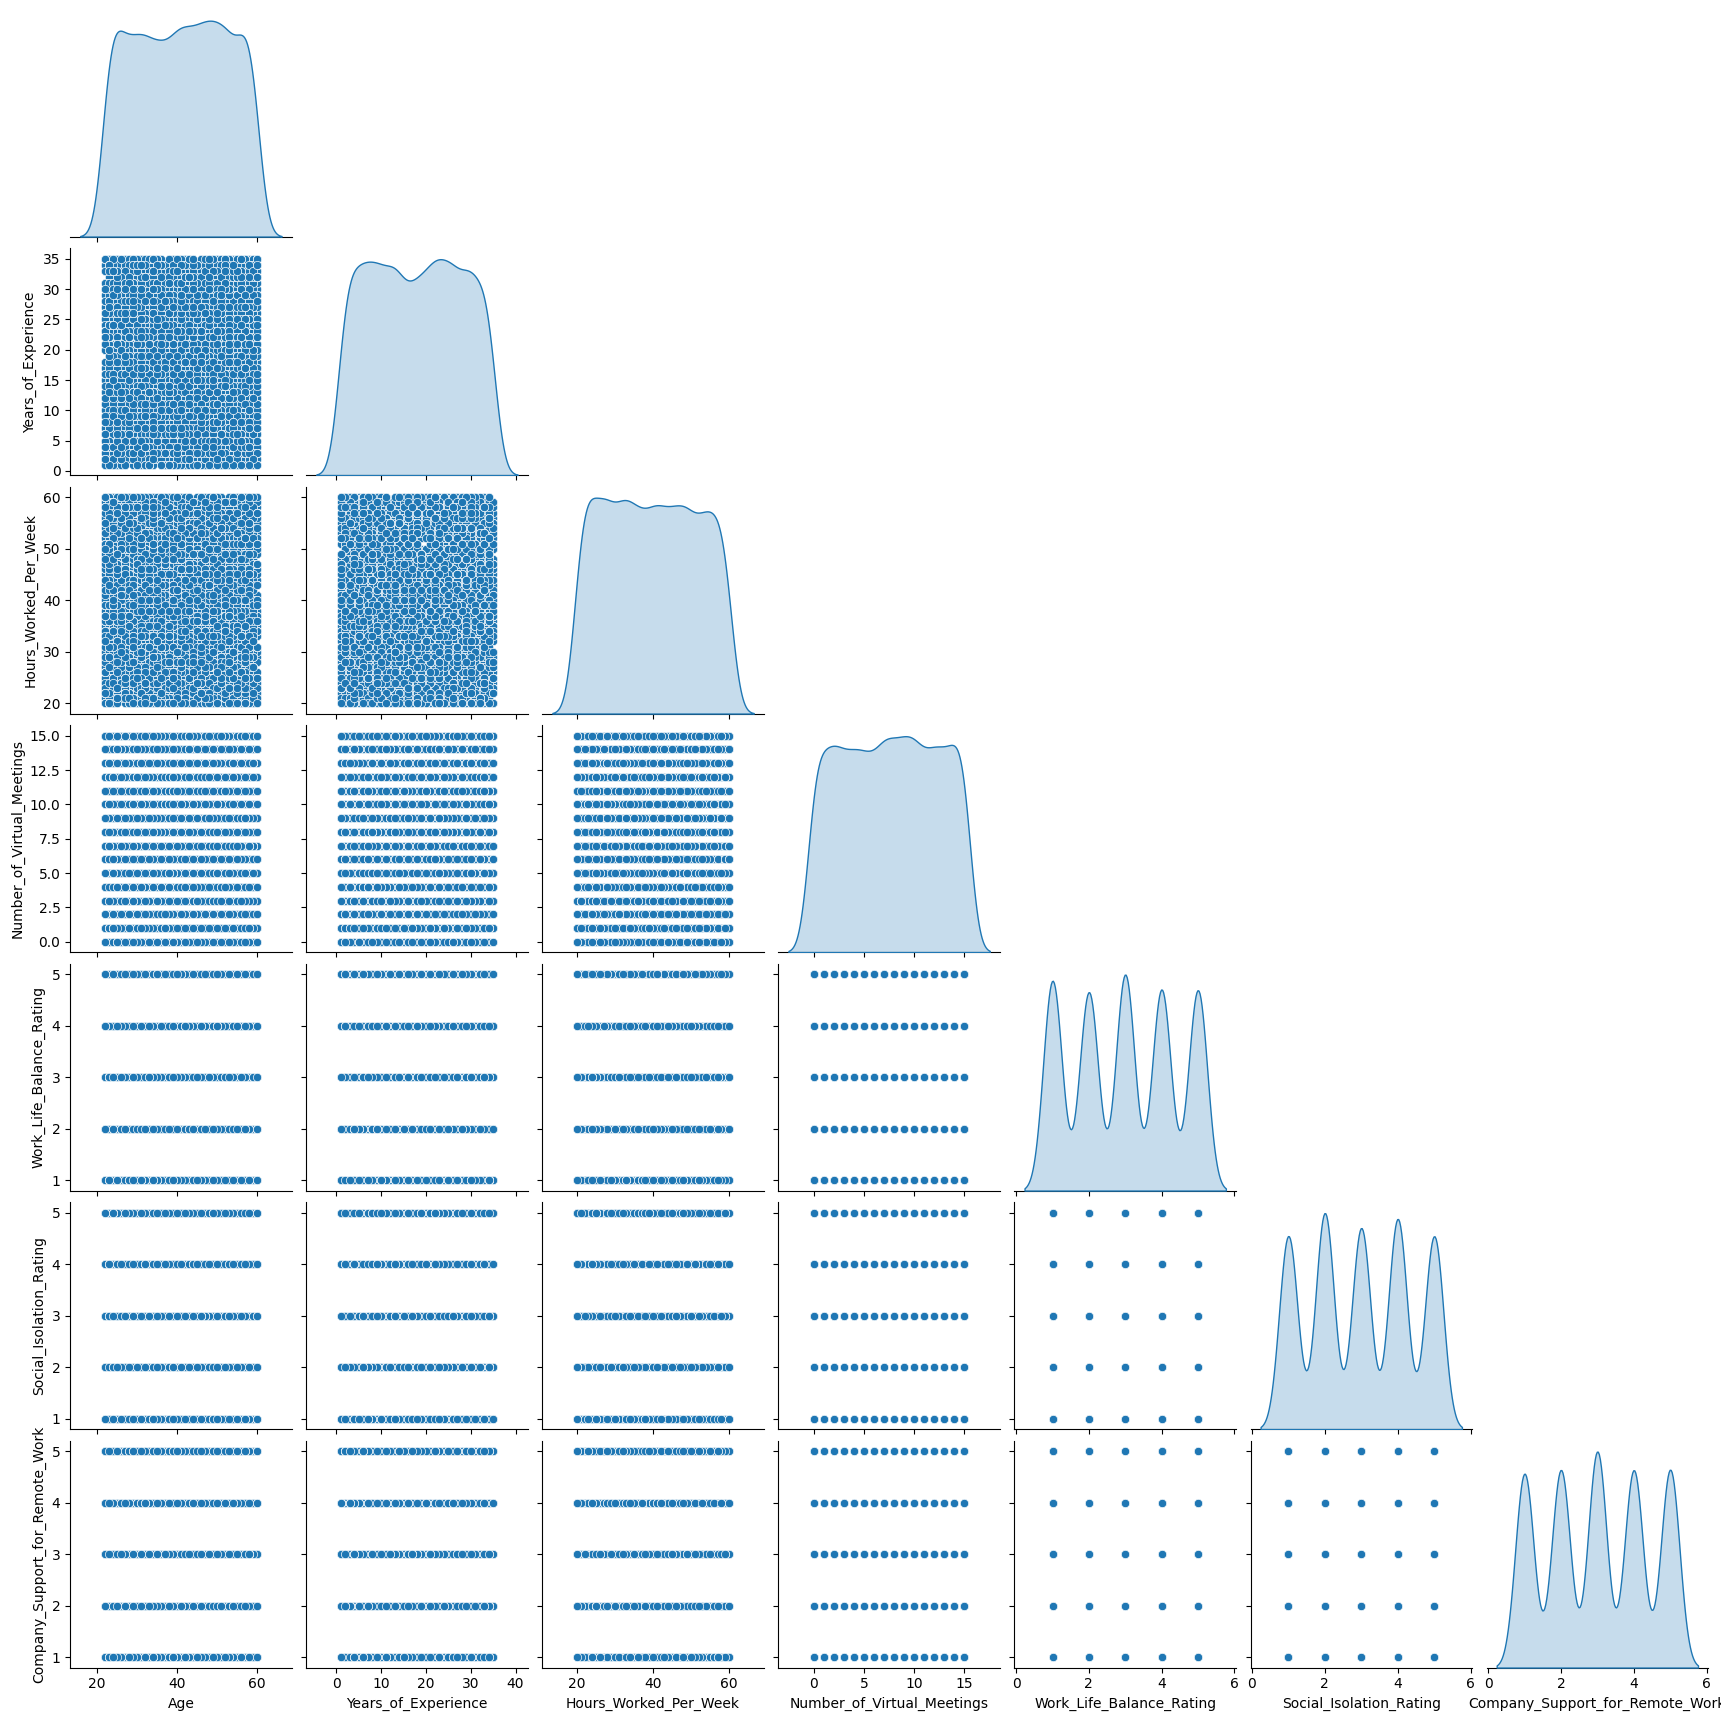

In [19]:
numeric_data = health.select_dtypes(include='number')
sns.pairplot(numeric_data, diag_kind='kde', corner=True)
plt.show()

Claramente, las variables numéricas no tienen relación entre sí.

Como los datos que estamos analizando son solo una muestra, vamos a realizar tests de hipótesis para ver si hay alguna relación entre las variables.

#RELACIONES ENTRE CATEGORICAS

In [20]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health["Job_Role"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 5.159734625591554, p-value: 0.9524296472836448


Son independientes

In [21]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health["Stress_Level"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 1.92229721637196, p-value: 0.7500478443616597


Son independientes

In [22]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health["Mental_Health_Condition"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 3.335476831604484, p-value: 0.50333096779003


In [23]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health["Access_to_Mental_Health_Resources"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 1.6876655513637617, p-value: 0.4300590407363335


In [24]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health["Productivity_Change"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 2.150243239109225, p-value: 0.7081482208219014


In [25]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health["Satisfaction_with_Remote_Work"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 14.488583346162601, p-value: 0.0058884019693480035


Vemos que sí que hay relación entre las dos variables

In [26]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health["Sleep_Quality"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 2.5859538641456092, p-value: 0.6293133413330045


Son independientes

#TEST CATEGORICA- NUMERICA

In [27]:
from scipy.stats import f_oneway

In [28]:
grupo_a = health.loc[health.Work_Location == "Remote"]["Age"]
grupo_b = health.loc[health.Work_Location == "Hybrid"]["Age"]
grupo_c = health.loc[health.Work_Location == "Onsite"]["Age"]

f_stat, p_valor = f_oneway(grupo_a, grupo_b, grupo_c)

print(f"Estadístico F: {f_stat}, p-valor: {p_valor}")

Estadístico F: 0.23017956329602404, p-valor: 0.7943993686045103


No rechazamos la hipótesis nula

In [29]:
grupo_a = health.loc[health.Work_Location == "Remote"]["Years_of_Experience"]
grupo_b = health.loc[health.Work_Location == "Hybrid"]["Years_of_Experience"]
grupo_c = health.loc[health.Work_Location == "Onsite"]["Years_of_Experience"]

f_stat, p_valor = f_oneway(grupo_a, grupo_b, grupo_c)

print(f"Estadístico F: {f_stat}, p-valor: {p_valor}")

Estadístico F: 0.50750704222379, p-valor: 0.6020254820408324


In [30]:
grupo_a = health.loc[health.Work_Location == "Remote"]["Hours_Worked_Per_Week"]
grupo_b = health.loc[health.Work_Location == "Hybrid"]["Hours_Worked_Per_Week"]
grupo_c = health.loc[health.Work_Location == "Onsite"]["Hours_Worked_Per_Week"]

f_stat, p_valor = f_oneway(grupo_a, grupo_b, grupo_c)

print(f"Estadístico F: {f_stat}, p-valor: {p_valor}")

Estadístico F: 0.4249350673103193, p-valor: 0.6538358612127564


In [31]:
grupo_a = health.loc[health.Work_Location == "Remote"]["Number_of_Virtual_Meetings"]
grupo_b = health.loc[health.Work_Location == "Hybrid"]["Number_of_Virtual_Meetings"]
grupo_c = health.loc[health.Work_Location == "Onsite"]["Number_of_Virtual_Meetings"]

f_stat, p_valor = f_oneway(grupo_a, grupo_b, grupo_c)

print(f"Estadístico F: {f_stat}, p-valor: {p_valor}")

Estadístico F: 4.844057514229829, p-valor: 0.007912054639926933


Rechazamos la hipótesis nula, sí hay relación

In [32]:
grupo_a = health.loc[health.Work_Location == "Remote"]["Work_Life_Balance_Rating"]
grupo_b = health.loc[health.Work_Location == "Hybrid"]["Work_Life_Balance_Rating"]
grupo_c = health.loc[health.Work_Location == "Onsite"]["Work_Life_Balance_Rating"]

f_stat, p_valor = f_oneway(grupo_a, grupo_b, grupo_c)

print(f"Estadístico F: {f_stat}, p-valor: {p_valor}")

Estadístico F: 1.1803448178270883, p-valor: 0.3072584295175477


In [33]:
grupo_a = health.loc[health.Work_Location == "Remote"]["Social_Isolation_Rating"]
grupo_b = health.loc[health.Work_Location == "Hybrid"]["Social_Isolation_Rating"]
grupo_c = health.loc[health.Work_Location == "Onsite"]["Social_Isolation_Rating"]

f_stat, p_valor = f_oneway(grupo_a, grupo_b, grupo_c)

print(f"Estadístico F: {f_stat}, p-valor: {p_valor}")

Estadístico F: 0.7036564919853698, p-valor: 0.494821877482158


In [34]:
grupo_a = health.loc[health.Work_Location == "Remote"]["Company_Support_for_Remote_Work"]
grupo_b = health.loc[health.Work_Location == "Hybrid"]["Company_Support_for_Remote_Work"]
grupo_c = health.loc[health.Work_Location == "Onsite"]["Company_Support_for_Remote_Work"]

f_stat, p_valor = f_oneway(grupo_a, grupo_b, grupo_c)

print(f"Estadístico F: {f_stat}, p-valor: {p_valor}")

Estadístico F: 1.0677509936683465, p-valor: 0.343859235899889


Como no hemos encontrado muchas relaciones vamos a buscar a ver si hay alguna que se nos ha escapado. Entre numéricas no lo hacemos porque ya nos ha dicho la matriz de correlaciones que no hay relación entre ellas.

In [35]:
from itertools import combinations
from scipy.stats import chi2_contingency

categorical_vars = ["Job_Role", "Industry", "Work_Location", "Stress_Level", "Mental_Health_Condition", 
                       "Access_to_Mental_Health_Resources", "Productivity_Change", "Satisfaction_with_Remote_Work", "Physical_Activity",
                       "Sleep_Quality", "Region", "Has_condition"]
results = []

for var1, var2 in combinations(categorical_vars, 2):
    contingency_table = pd.crosstab(health[var1], health[var2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    results.append((var1, var2, chi2, p))

chi2_results = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Chi2', 'p-value'])

significant_results = chi2_results[chi2_results['p-value'] < 0.05]

significant_results = significant_results.sort_values(by='p-value')

print(significant_results)


                           Variable 1                         Variable 2  \
10                           Job_Role                      Has_condition   
25                      Work_Location      Satisfaction_with_Remote_Work   
31                       Stress_Level  Access_to_Mental_Health_Resources   
53                Productivity_Change                      Sleep_Quality   
39            Mental_Health_Condition                Productivity_Change   
45  Access_to_Mental_Health_Resources                Productivity_Change   

         Chi2   p-value  
10  32.954067  0.000011  
25  14.488583  0.005888  
31   7.224236  0.026995  
53   9.962953  0.041056  
39   9.842172  0.043172  
45   6.272912  0.043436  


In [36]:
from scipy import stats
import pandas as pd


categorical_columns = health.select_dtypes(include=['object', 'category']).columns
numerical_columns = health.select_dtypes(include=['number']).columns

anova_results_significant = {}

# Realizar ANOVA de un factor para cada combinación categórica-numérica
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        # Agrupar los datos por la variable categórica
        groups = [health[health[cat_col] == category][num_col] for category in health[cat_col].unique()]
        
        # Realizar ANOVA
        f_statistic, p_value = stats.f_oneway(*groups)
        
        # Solo guardar los resultados si el p-valor es significativo (menor que 0.05)
        if p_value < 0.05:
            anova_results_significant[(cat_col, num_col)] = {'F-statistic': f_statistic, 'p-value': p_value}

# Convertir los resultados a un DataFrame para visualizarlos
anova_df_significant = pd.DataFrame.from_dict(anova_results_significant, orient='index')

# Mostrar los resultados significativos
print(anova_df_significant)


                                                              F-statistic  \
Gender                            Social_Isolation_Rating        3.361850   
Work_Location                     Number_of_Virtual_Meetings     4.844058   
Access_to_Mental_Health_Resources Years_of_Experience            5.149700   

                                                               p-value  
Gender                            Social_Isolation_Rating     0.017928  
Work_Location                     Number_of_Virtual_Meetings  0.007912  
Access_to_Mental_Health_Resources Years_of_Experience         0.023293  


C:\Users\patri\AppData\Local\Temp\ipykernel_9028\615731874.py:17: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_statistic, p_value = stats.f_oneway(*groups)


Vistos lo análisis, nos vamos a centrar en esas relaciones: 

Job_Role - Has_condition   
Work_Location - Satisfaction_with_Remote_Work   
Stress_Level - Access_to_Mental_Health_Resources   
Productivity_Change - Sleep_Quality   
Mental_Health_Condition - Productivity_Change   
Access_to_Mental_Health_Resources - Productivity_Change   
Vistos lo análisis, nos vamos a centrar en esas relaciones: 


Gender - Social_Isolation_Rating         
Work_Location - Number_of_Virtual_Meetings        
Access_to_Mental_Health_Resources - Years_of_Experience               


